## Computational Drug Discovery through the Bioactivity Data

Sohel Ahmed


## **ChEMBL Database**



In [1]:
!pip install chembl-webresource-client


## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [2]:
pip install chembl_webresource_client

Note: you may need to restart the kernel to use updated packages.


## **Importing libraries**

In [2]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data=pd.read_csv("coronavirus_std.csv")

In [5]:
data

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type
0,CHEMBL372199,NaN,None,517.93,1,4.67,MRK-560,O=S(=O)(N[C@H]1CC[C@@](c2cc(F)ccc2F)(S(=O)(=O)...,Inhibition,'=',3.759,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,0.0,CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,None,None,None,None,NaN,NaN,NaN,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL4495564,52.0,SARS-CoV-2 Screening Data 2020-21,NaN,2020.0,None,NaN,NaN
1,CHEMBL2068237,CISPLATIN,4,298.03,None,None,CISPLATIN,NaN,Inhibition,'=',98.710,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,0.0,CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,None,None,None,None,NaN,NaN,NaN,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL4495564,52.0,SARS-CoV-2 Screening Data 2020-21,NaN,2020.0,None,NaN,NaN
2,CHEMBL24132,IODOANTIPYRINE,-1,314.13,0,2.09,Iodoantipyrine,Cc1c(I)c(=O)n(-c2ccccc2)n1C,Inhibition,'=',3.610,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,0.0,CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,None,None,None,None,NaN,NaN,NaN,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL4495564,52.0,SARS-CoV-2 Screening Data 2020-21,NaN,2020.0,None,NaN,NaN
3,CHEMBL1571,TESTOLACTONE,4,300.4,0,3.59,Testolactone,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)O...,Inhibition,'=',14.110,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,0.0,CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,None,None,None,None,NaN,NaN,NaN,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL4495564,52.0,SARS-CoV-2 Screening Data 2020-21,NaN,2020.0,None,NaN,NaN
4,CHEMBL608,PROBUCOL,4,516.86,2,9.91,PROBUCOL,CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C...,Inhibition,'=',26.510,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,0.0,CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,None,None,None,None,NaN,NaN,NaN,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL4495564,52.0,SARS-CoV-2 Screening Data 2020-21,NaN,2020.0,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10686,CHEMBL5206079,NaN,None,310.22,0,4.89,11; Jun9-13-9,C[C@H](c1ccccc1Cl)N(C)Cc1cc(O)ccc1Cl,IC50,'=',6670.000,nM,5.18,NaN,NaN,UO_0000065,16.68,0.35,0.29,22.05,0.0,CHEMBL5139881,Inhibition of C-terminal His-tagged SARS-CoV-2...,B,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,None,None,None,None,NaN,NaN,NaN,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL5137028,1.0,Scientific Literature,J Med Chem,2022.0,None,TIME = 4.0 hr,INHIBITOR
10687,CHEMBL51

In [6]:
def summary(data):
    print(f"Dataset has {data.shape[1]} features and {data.shape[0]} examples.")
    summary = pd.DataFrame(index=data.columns)
    summary["Unique"] = data.nunique().values
    summary["Missing"] = data.isnull().sum().values
    summary["Duplicated"] = data.duplicated().sum()
    summary["Types"] = data.dtypes
    return summary

In [7]:
def percent_value_counts(data, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(data.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(data.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [8]:
summary(data)

Dataset has 46 features and 10691 examples.


,Unique,Missing,Duplicated,Types
Molecule ChEMBL ID,8314,0,5,object
Molecule Name,4115,5257,5,object
Molecule Max Phase,7,29,5,object
Molecular Weight,5928,29,5,object
#RO5 Violations,6,29,5,object
AlogP,1102,29,5,object
Compound Key,8833,29,5,object
Smiles,8214,124,5,object
Standard Type,15,67,5,object
Standard Relation,5,265,5,object


In [9]:
data.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type'],
      dtype='object')

In [10]:
data.drop(['Molecule Name', 'Molecule Max Phase','pChEMBL Value', 'Data Validity Comment', 'Comment',
           'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI','Assay Tissue ChEMBL ID', 'Assay Tissue Name', 
            'Assay Cell Type', 'Assay Subcellular Fraction', 'Assay Parameters', 'Assay Variant Accession',
             'Document Journal','Assay Variant Mutation',
           'Cell ChEMBL ID', 'Properties', 'Action Type', ], axis=1, inplace=True)

In [11]:
data1=data.copy()

In [12]:
summary(data1)

Dataset has 26 features and 10691 examples.


,Unique,Missing,Duplicated,Types
Molecule ChEMBL ID,8314,0,5,object
Molecular Weight,5928,29,5,object
#RO5 Violations,6,29,5,object
AlogP,1102,29,5,object
Compound Key,8833,29,5,object
Smiles,8214,124,5,object
Standard Type,15,67,5,object
Standard Relation,5,265,5,object
Standard Value,6407,265,5,float64
Standard Units,8,176,5,object


In [13]:
print(data1.columns)


Index(['Molecule ChEMBL ID', 'Molecular Weight', '#RO5 Violations', 'AlogP',
       'Compound Key', 'Smiles', 'Standard Type', 'Standard Relation',
       'Standard Value', 'Standard Units', 'Uo Units', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Target ChEMBL ID', 'Target Name',
       'Target Organism', 'Target Type', 'Document ChEMBL ID', 'Source ID',
       'Source Description', 'Document Year'],
      dtype='object')


In [14]:
data2 = data1[data1['Standard Value'].notna()]


In [15]:
summary(data2)

Dataset has 26 features and 10426 examples.


,Unique,Missing,Duplicated,Types
Molecule ChEMBL ID,8238,0,0,object
Molecular Weight,5904,0,0,object
#RO5 Violations,6,0,0,object
AlogP,1100,0,0,object
Compound Key,8805,0,0,object
Smiles,8187,57,0,object
Standard Type,14,0,0,object
Standard Relation,5,0,0,object
Standard Value,6407,0,0,float64
Standard Units,8,5,0,object


In [16]:
data2

,Molecule ChEMBL ID,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Uo Units,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Year
0,CHEMBL372199,517.93,1,4.67,MRK-560,O=S(=O)(N[C@H]1CC[C@@](c2cc(F)ccc2F)(S(=O)(=O)...,Inhibition,'=',3.759,%,UO_0000187,0.0,CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL4495564,52.0,SARS-CoV-2 Screening Data 2020-21,2020.0
1,CHEMBL2068237,298.03,None,None,CISPLATIN,NaN,Inhibition,'=',98.710,%,UO_0000187,0.0,CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL4495564,52.0,SARS-CoV-2 Screening Data 2020-21,2020.0
2,CHEMBL24132,314.13,0,2.09,Iodoantipyrine,Cc1c(I)c(=O)n(-c2ccccc2)n1C,Inhibition,'=',3.610,%,UO_0000187,0.0,CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL4495564,52.0,SARS-CoV-2 Screening Data 2020-21,2020.0
3,CHEMBL1571,300.4,0,3.59,Testolactone,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)O...,Inhibition,'=',14.110,%,UO_0000187,0.0,CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL4495564,52.0,SARS-CoV-2 Screening Data 2020-21,2020.0
4,CHEMBL608,516.86,2,9.91,PROBUCOL,CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C...,Inhibition,'=',26.510,%,UO_0000187,0.0,CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL4495564,52.0,SARS-CoV-2 Screening Data 2020-21,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10686,CHEMBL5206079,310.22,0,4.89,11; Jun9-13-9,C[C@H](c1ccccc1Cl)N(C)Cc1cc(O)ccc1Cl,IC50,'=',6670.000,nM,UO_0000065,0.0,CHEMBL5139881,Inhibition of C-terminal His-tagged SARS-CoV-2...,B,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL5137028,1.0,Scientific Literature,2022.0
10687,CHEMBL5190815,502.57,2,6,26,C[C@H](NC(=O)C(c1cccnc1)N(C(=O)c1cnco1)c1ccc(-...,IC50,'=',4970.000,nM,UO_0000065,0.0,CHEMBL5155031,Non-covalent inhibition of SARS-Cov-2 -Mpro in...,B,BAO_0000357,single protein format,Severe acute respiratory syndrome coronavirus 2,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL5154635,1.0,Scientific Literature,2022.0
10688,CHEMBL5189663,478.57,0,1.31,25m,CC1(C)[C@H](C(=O)OCc2ccccc2)N2C(=O)[C@@H](NC(=...,IC50,'=',4100.000,nM,UO_0000065,0.0,CHEMBL5167208,Inhibition of recombinant SARS-CoV-2 Main prot...,B,BAO_0000357,single protein format,Severe acute respiratory syndrome coronavirus 2,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL5154912,1.0,Scientific Literature,2022.0
10689,CHEMBL5220471,567.68,1,1.56,3l,[2H]C([2H])(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](...,IC50,'=',270.000,nM,UO_0000065,0.0,CHEMBL5215875,Inhibition of SARS-CoV-2 3CLpro using FAM-SAVL...,B

In [17]:
bioactivity_class = []

for value in data2['Standard Value']:
    if float(value) >= 10000:
        bioactivity_class.append("inactive")
    elif float(value) <= 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermediate")


In [18]:
data2.head(3)

,Molecule ChEMBL ID,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Uo Units,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Year
0,CHEMBL372199,517.93,1,4.67,MRK-560,O=S(=O)(N[C@H]1CC[C@@](c2cc(F)ccc2F)(S(=O)(=O)...,Inhibition,'=',3.759,%,UO_0000187,0.0,CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL4495564,52.0,SARS-CoV-2 Screening Data 2020-21,2020.0
1,CHEMBL2068237,298.03,None,None,CISPLATIN,NaN,Inhibition,'=',98.710,%,UO_0000187,0.0,CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL4495564,52.0,SARS-CoV-2 Screening Data 2020-21,2020.0
2,CHEMBL24132,314.13,0,2.09,Iodoantipyrine,Cc1c(I)c(=O)n(-c2ccccc2)n1C,Inhibition,'=',3.610,%,UO_0000187,0.0,CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,BAO_0000019,assay format,Severe acute respiratory syndrome coronavirus 2,CHEMBL4523582,Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,SINGLE PROTEIN,CHEMBL4495564,52.0,SARS-CoV-2 Screening Data 2020-21,2020.0


In [19]:
# Iteraate the Molecule Chemical id to a list

In [20]:
mol_cid=[]
for i in data2['Molecule ChEMBL ID']:
    mol_cid.append(i)

In [21]:
# Iterate the Canonical Smiles to a list

In [22]:
cano_smiles=[]
for i in data2['Smiles']:
    cano_smiles.append(i)

In [23]:
# Iterate the standard value to a list 


In [24]:
std_value=[]
for i in data2['Standard Value']:
    std_value.append(i)

In [25]:
# Combine the 4 lists into a dataframe 
data_tuples=list(zip(mol_cid, cano_smiles, bioactivity_class, std_value))
data3=pd.DataFrame(data_tuples, columns=['mol_cid', 'cano_smiles', 'bioactivity_class', 'std_value'])

In [26]:
data3

,mol_cid,cano_smiles,bioactivity_class,std_value
0,CHEMBL372199,O=S(=O)(N[C@H]1CC[C@@](c2cc(F)ccc2F)(S(=O)(=O)...,active,3.759
1,CHEMBL2068237,NaN,active,98.710
2,CHEMBL24132,Cc1c(I)c(=O)n(-c2ccccc2)n1C,active,3.610
3,CHEMBL1571,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)O...,active,14.110
4,CHEMBL608,CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C...,active,26.510
...,...,...,...,...
10421,CHEMBL5206079,C[C@H](c1ccccc1Cl)N(C)Cc1cc(O)ccc1Cl,intermediate,6670.000
10422,CHEMBL5190815,C[C@H](NC(=O)C(c1cccnc1)N(C(=O)c1cnco1)c1ccc(-...,intermediate,4970.000
10423,CHEMBL5189663,CC1(C)[C@H](C(=O)OCc2ccccc2)N2C(=O)[C@@H](NC(=...,intermediate,4100.000
10424,CHEMBL5220471,[2H]C([2H])(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](...,active,270.000


In [27]:
data3.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [28]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [29]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors
     

In [30]:
data3

,mol_cid,cano_smiles,bioactivity_class,std_value
0,CHEMBL372199,O=S(=O)(N[C@H]1CC[C@@](c2cc(F)ccc2F)(S(=O)(=O)...,active,3.759
1,CHEMBL2068237,NaN,active,98.710
2,CHEMBL24132,Cc1c(I)c(=O)n(-c2ccccc2)n1C,active,3.610
3,CHEMBL1571,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)O...,active,14.110
4,CHEMBL608,CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C...,active,26.510
...,...,...,...,...
10421,CHEMBL5206079,C[C@H](c1ccccc1Cl)N(C)Cc1cc(O)ccc1Cl,intermediate,6670.000
10422,CHEMBL5190815,C[C@H](NC(=O)C(c1cccnc1)N(C(=O)c1cnco1)c1ccc(-...,intermediate,4970.000
10423,CHEMBL5189663,CC1(C)[C@H](C(=O)OCc2ccccc2)N2C(=O)[C@@H](NC(=...,intermediate,4100.000
10424,CHEMBL5220471,[2H]C([2H])(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](...,active,270.000


In [31]:
import numpy as np

# Replace 'nan' with np.nan
data3['cano_smiles'] = data3['cano_smiles'].replace('nan', np.nan)

# Drop rows with 'nan' in the 'cano_smiles' column
data3.dropna(subset=['cano_smiles'], inplace=True)

# Convert the column to string
data3['cano_smiles'] = data3['cano_smiles'].astype(str)



In [32]:
data3['cano_smiles'] = data3['cano_smiles'].astype(str)

data3_lipinski = lipinski(data3['cano_smiles'])


In [33]:
data3_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,517.925000,4.66920,1.0,4.0
1,314.126000,2.08902,0.0,3.0
2,300.398000,3.58990,0.0,3.0
3,516.857000,9.90830,2.0,4.0
4,527.669000,5.98642,2.0,6.0
...,...,...,...,...
10364,310.224000,4.89200,1.0,2.0
10365,502.574000,6.00210,1.0,5.0
10366,478.567000,1.30780,1.0,7.0
10367,567.677204,-1.77770,4.0,8.0


In [34]:
data_combined=pd.concat([data3, data3_lipinski], axis=1)

In [35]:
data_combined

,mol_cid,cano_smiles,bioactivity_class,std_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL372199,O=S(=O)(N[C@H]1CC[C@@](c2cc(F)ccc2F)(S(=O)(=O)...,active,3.759,517.925,4.66920,1.0,4.0
2,CHEMBL24132,Cc1c(I)c(=O)n(-c2ccccc2)n1C,active,3.610,300.398,3.58990,0.0,3.0
3,CHEMBL1571,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)O...,active,14.110,516.857,9.90830,2.0,4.0
4,CHEMBL608,CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C...,active,26.510,527.669,5.98642,2.0,6.0
5,CHEMBL103667,Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(OCCN3CCO...,active,-8.159,777.088,-1.01430,8.0,8.0
...,...,...,...,...,...,...,...,...
8966,NaN,NaN,NaN,NaN,867.127,6.14960,4.0,13.0
9395,NaN,NaN,NaN,NaN,461.529,5.65492,4.0,7.0
9667,NaN,NaN,NaN,NaN,225.229,0.51638,1.0,6.0
9700,NaN,NaN,NaN,NaN,230.271,1.87430,1.0,5.0


In [37]:
# Assuming data_combined is the name of your DataFrame
data_combined = data_combined.dropna()


In [38]:
data_combined

,mol_cid,cano_smiles,bioactivity_class,std_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL372199,O=S(=O)(N[C@H]1CC[C@@](c2cc(F)ccc2F)(S(=O)(=O)...,active,3.759,517.925000,4.66920,1.0,4.0
2,CHEMBL24132,Cc1c(I)c(=O)n(-c2ccccc2)n1C,active,3.610,300.398000,3.58990,0.0,3.0
3,CHEMBL1571,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)O...,active,14.110,516.857000,9.90830,2.0,4.0
4,CHEMBL608,CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C...,active,26.510,527.669000,5.98642,2.0,6.0
5,CHEMBL103667,Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(OCCN3CCO...,active,-8.159,777.088000,-1.01430,8.0,8.0
...,...,...,...,...,...,...,...,...
10364,CHEMBL5200032,CC(=O)OCC1Cc2c(-c3ccccn3)cccc2-c2c(O)ccc(C)c21,inactive,61150.000,310.224000,4.89200,1.0,2.0
10365,CHEMBL5200159,CCc1ccc(O)c2c1C(COC(C)=O)Cc1c(-c3ccccn3)cccc1-2,inactive,33060.000,502.574000,6.00210,1.0,5.0
10366,CHEMBL5170998,CC(=O)OCC1Cc2c(-c3ccccn3)ccc(C)c2-c2c(O)ccc(C)c21,inactive,100000.000,478.567000,1.30780,1.0,7.0
10367,CHEMBL5188905,CCN(C[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C...,active,80.000,567.677204,-1.77770,4.0,8.0


In [39]:
print(data_combined.columns)

Index(['mol_cid', 'cano_smiles', 'bioactivity_class', 'std_value', 'MW',
       'LogP', 'NumHDonors', 'NumHAcceptors'],
      dtype='object')


In [40]:
columns_to_clean = ['mol_cid', 'cano_smiles', 'bioactivity_class', 'std_value', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']

data_combined1 = data_combined.dropna(subset=columns_to_clean)


In [41]:
data_combined1

,mol_cid,cano_smiles,bioactivity_class,std_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL372199,O=S(=O)(N[C@H]1CC[C@@](c2cc(F)ccc2F)(S(=O)(=O)...,active,3.759,517.925000,4.66920,1.0,4.0
2,CHEMBL24132,Cc1c(I)c(=O)n(-c2ccccc2)n1C,active,3.610,300.398000,3.58990,0.0,3.0
3,CHEMBL1571,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)O...,active,14.110,516.857000,9.90830,2.0,4.0
4,CHEMBL608,CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C...,active,26.510,527.669000,5.98642,2.0,6.0
5,CHEMBL103667,Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(OCCN3CCO...,active,-8.159,777.088000,-1.01430,8.0,8.0
...,...,...,...,...,...,...,...,...
10364,CHEMBL5200032,CC(=O)OCC1Cc2c(-c3ccccn3)cccc2-c2c(O)ccc(C)c21,inactive,61150.000,310.224000,4.89200,1.0,2.0
10365,CHEMBL5200159,CCc1ccc(O)c2c1C(COC(C)=O)Cc1c(-c3ccccn3)cccc1-2,inactive,33060.000,502.574000,6.00210,1.0,5.0
10366,CHEMBL5170998,CC(=O)OCC1Cc2c(-c3ccccn3)ccc(C)c2-c2c(O)ccc(C)c21,inactive,100000.000,478.567000,1.30780,1.0,7.0
10367,CHEMBL5188905,CCN(C[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C...,active,80.000,567.677204,-1.77770,4.0,8.0


In [42]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['std_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('std_value_norm', 1)
        
    return x

In [43]:
data_combined1.std_value.describe()

count     10312.000000
mean       1137.239320
std        8031.467412
min        -312.520000
25%           5.423000
50%          13.040000
75%          24.000000
max      200000.000000
Name: std_value, dtype: float64

In [44]:
def norm_value(input):
    norm = []

    for i in input['std_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['std_value_norm'] = norm
    x = input.drop('std_value', 1)
        
    return x

In [45]:
data_norm = norm_value(data_combined1)
data_norm

C:\Users\sohel\AppData\Local\Temp\ipykernel_17872\3600171784.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('std_value', 1)


,mol_cid,cano_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,std_value_norm
0,CHEMBL372199,O=S(=O)(N[C@H]1CC[C@@](c2cc(F)ccc2F)(S(=O)(=O)...,active,517.925000,4.66920,1.0,4.0,3.759
2,CHEMBL24132,Cc1c(I)c(=O)n(-c2ccccc2)n1C,active,300.398000,3.58990,0.0,3.0,3.610
3,CHEMBL1571,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)O...,active,516.857000,9.90830,2.0,4.0,14.110
4,CHEMBL608,CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C...,active,527.669000,5.98642,2.0,6.0,26.510
5,CHEMBL103667,Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(OCCN3CCO...,active,777.088000,-1.01430,8.0,8.0,-8.159
...,...,...,...,...,...,...,...,...
10364,CHEMBL5200032,CC(=O)OCC1Cc2c(-c3ccccn3)cccc2-c2c(O)ccc(C)c21,inactive,310.224000,4.89200,1.0,2.0,61150.000
10365,CHEMBL5200159,CCc1ccc(O)c2c1C(COC(C)=O)Cc1c(-c3ccccn3)cccc1-2,inactive,502.574000,6.00210,1.0,5.0,33060.000
10366,CHEMBL5170998,CC(=O)OCC1Cc2c(-c3ccccn3)ccc(C)c2-c2c(O)ccc(C)c21,inactive,478.567000,1.30780,1.0,7.0,100000.000
10367,CHEMBL5188905,CCN(C[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C...,active,567.677204,-1.77770,4.0,8.0,80.000


In [46]:
data_norm.std_value_norm.describe()

count     10312.000000
mean       1137.239320
std        8031.467412
min        -312.520000
25%           5.423000
50%          13.040000
75%          24.000000
max      200000.000000
Name: std_value_norm, dtype: float64

In [47]:
data_final = pIC50(data_norm)
data_final
     

C:\Users\sohel\AppData\Local\Temp\ipykernel_17872\2693366818.py:8: RuntimeWarning: invalid value encountered in log10
  pIC50.append(-np.log10(molar))
C:\Users\sohel\AppData\Local\Temp\ipykernel_17872\2693366818.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('std_value_norm', 1)


,mol_cid,cano_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL372199,O=S(=O)(N[C@H]1CC[C@@](c2cc(F)ccc2F)(S(=O)(=O)...,active,517.925000,4.66920,1.0,4.0,8.424928
2,CHEMBL24132,Cc1c(I)c(=O)n(-c2ccccc2)n1C,active,300.398000,3.58990,0.0,3.0,8.442493
3,CHEMBL1571,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)O...,active,516.857000,9.90830,2.0,4.0,7.850473
4,CHEMBL608,CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C...,active,527.669000,5.98642,2.0,6.0,7.576590
5,CHEMBL103667,Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(OCCN3CCO...,active,777.088000,-1.01430,8.0,8.0,NaN
...,...,...,...,...,...,...,...,...
10364,CHEMBL5200032,CC(=O)OCC1Cc2c(-c3ccccn3)cccc2-c2c(O)ccc(C)c21,inactive,310.224000,4.89200,1.0,2.0,4.213604
10365,CHEMBL5200159,CCc1ccc(O)c2c1C(COC(C)=O)Cc1c(-c3ccccn3)cccc1-2,inactive,502.574000,6.00210,1.0,5.0,4.480697
10366,CHEMBL5170998,CC(=O)OCC1Cc2c(-c3ccccn3)ccc(C)c2-c2c(O)ccc(C)c21,inactive,478.567000,1.30780,1.0,7.0,4.000000
10367,CHEMBL5188905,CCN(C[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C...,active,567.677204,-1.77770,4.0,8.0,7.096910


In [48]:
data_final.pIC50.describe()

count    9142.000000
mean        7.670603
std         0.885175
min         3.698970
25%         7.577246
50%         7.832240
75%         8.089056
max        11.318759
Name: pIC50, dtype: float64

In [49]:
data_2class = data_final[data_final.bioactivity_class != 'intermediate']
data_2class

,mol_cid,cano_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL372199,O=S(=O)(N[C@H]1CC[C@@](c2cc(F)ccc2F)(S(=O)(=O)...,active,517.925000,4.66920,1.0,4.0,8.424928
2,CHEMBL24132,Cc1c(I)c(=O)n(-c2ccccc2)n1C,active,300.398000,3.58990,0.0,3.0,8.442493
3,CHEMBL1571,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)O...,active,516.857000,9.90830,2.0,4.0,7.850473
4,CHEMBL608,CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C...,active,527.669000,5.98642,2.0,6.0,7.576590
5,CHEMBL103667,Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(OCCN3CCO...,active,777.088000,-1.01430,8.0,8.0,NaN
...,...,...,...,...,...,...,...,...
10364,CHEMBL5200032,CC(=O)OCC1Cc2c(-c3ccccn3)cccc2-c2c(O)ccc(C)c21,inactive,310.224000,4.89200,1.0,2.0,4.213604
10365,CHEMBL5200159,CCc1ccc(O)c2c1C(COC(C)=O)Cc1c(-c3ccccn3)cccc1-2,inactive,502.574000,6.00210,1.0,5.0,4.480697
10366,CHEMBL5170998,CC(=O)OCC1Cc2c(-c3ccccn3)ccc(C)c2-c2c(O)ccc(C)c21,inactive,478.567000,1.30780,1.0,7.0,4.000000
10367,CHEMBL5188905,CCN(C[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C...,active,567.677204,-1.77770,4.0,8.0,7.096910


In [50]:
print(data_2class.columns)

Index(['mol_cid', 'cano_smiles', 'bioactivity_class', 'MW', 'LogP',
       'NumHDonors', 'NumHAcceptors', 'pIC50'],
      dtype='object')


In [51]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

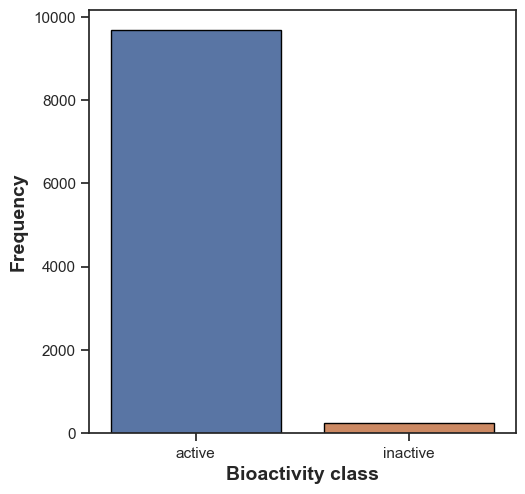

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=data_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

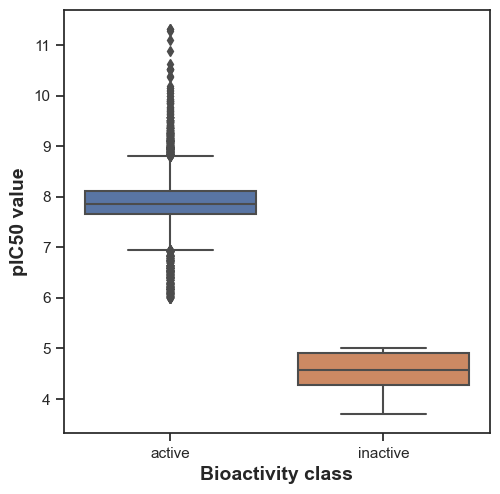

In [53]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = data_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [54]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  data1 = data_2class[selection]
  active = data1[data1.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  data1 = data_2class[selection]
  inactive = data1[data1.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [55]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


In [56]:

mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1131549.0,0.061069,0.05,Same distribution (fail to reject H0)


In [57]:

mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1309461.0,0.036445,0.05,Different distribution (reject H0)


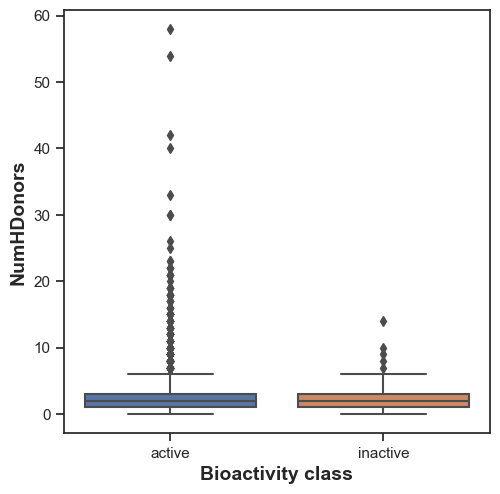

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = data_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [59]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1145278.0,0.107572,0.05,Same distribution (fail to reject H0)


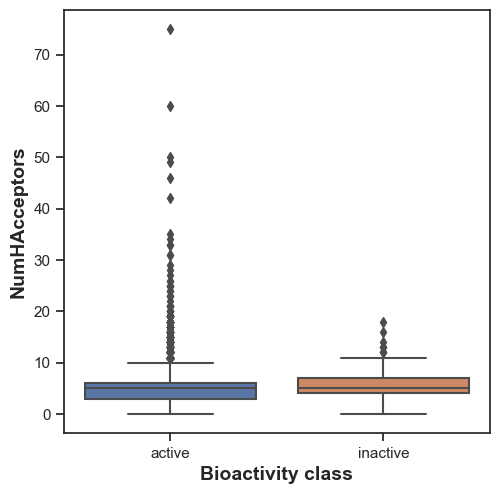

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = data_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [61]:

mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1156802.5,0.186285,0.05,Same distribution (fail to reject H0)


In [62]:
data4=data_2class

In [63]:
data4

,mol_cid,cano_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL372199,O=S(=O)(N[C@H]1CC[C@@](c2cc(F)ccc2F)(S(=O)(=O)...,active,517.925000,4.66920,1.0,4.0,8.424928
2,CHEMBL24132,Cc1c(I)c(=O)n(-c2ccccc2)n1C,active,300.398000,3.58990,0.0,3.0,8.442493
3,CHEMBL1571,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)O...,active,516.857000,9.90830,2.0,4.0,7.850473
4,CHEMBL608,CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C...,active,527.669000,5.98642,2.0,6.0,7.576590
5,CHEMBL103667,Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(OCCN3CCO...,active,777.088000,-1.01430,8.0,8.0,NaN
...,...,...,...,...,...,...,...,...
10364,CHEMBL5200032,CC(=O)OCC1Cc2c(-c3ccccn3)cccc2-c2c(O)ccc(C)c21,inactive,310.224000,4.89200,1.0,2.0,4.213604
10365,CHEMBL5200159,CCc1ccc(O)c2c1C(COC(C)=O)Cc1c(-c3ccccn3)cccc1-2,inactive,502.574000,6.00210,1.0,5.0,4.480697
10366,CHEMBL5170998,CC(=O)OCC1Cc2c(-c3ccccn3)ccc(C)c2-c2c(O)ccc(C)c21,inactive,478.567000,1.30780,1.0,7.0,4.000000
10367,CHEMBL5188905,CCN(C[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C...,active,567.677204,-1.77770,4.0,8.0,7.096910


In [64]:
selection = ['cano_smiles','mol_cid']
data4_selection = data4[selection]
data4_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [65]:
!more molecule.smi




O=S(=O)(N[C@H]1CC[C@@](c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl)cc2)CC1)C(F)(F)F CHEMBL372199
Cc1c(I)c(=O)n(-c2ccccc2)n1C     CHEMBL24132
C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)OC(=O)CC[C@@H]12   CHEMBL1571
CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1 CHEMBL608
Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(OCCN3CCOCC3)c3ccccc23)cc1 CHEMBL103667
C[C@H](O)C(=O)Nc1c(I)c(C(=O)NC(CO)CO)c(I)c(C(=O)NC(CO)CO)c1I    CHEMBL1200932
CC(C)(Cc1c[nH]c2ccc(Cl)cc12)NCCOc1ccccc1OCC1CC1 CHEMBL88272
C[C@]12C=CC(=O)C=C1CC[C@H]1[C@@H]3C[C@@H](O)[C@](O)(C(=O)CO)[C@@]3(C)C[C@H](O)[C@@]12F  CHEMBL1451
COCCCC=C(NOCCN)c1ccc(C(F)(F)F)cc1       CHEMBL4580236
CS(=O)(=O)N1CCN(Cc2cc3nc(-c4cccc5[nH]ncc45)nc(N4CCOCC4)c3s2)CC1 CHEMBL521851
COc1nc(N)nc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@@H]1O    CHEMBL1201112
O=P(O)(O)C(O)(Cn1ccnc1)P(=O)(O)O        CHEMBL924
Nc1nc(N)c2nc(-c3cccc(O)c3)c(-c3cccc(O)c3)nc2n1  CHEMBL230011
Cc1cc(SCc2sc(-c3ccc(C(F)(F)F)cc3)nc2C)ccc1OCC(=O)O      CHEMBL38943
C=CCn1c(=O)c2cnc(Nc3

In [66]:
with open('molecule.smi', 'r') as file:
    for _ in range(5):
        print(file.readline().strip())



O=S(=O)(N[C@H]1CC[C@@](c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl)cc2)CC1)C(F)(F)F	CHEMBL372199
Cc1c(I)c(=O)n(-c2ccccc2)n1C	CHEMBL24132
C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)OC(=O)CC[C@@H]12	CHEMBL1571
CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1	CHEMBL608
Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(OCCN3CCOCC3)c3ccccc23)cc1	CHEMBL103667


In [67]:
pip install padelpy

Note: you may need to restart the kernel to use updated packages.


In [68]:
xml_file = 'fingerprints.xml'

In [69]:
import os
print("Current Directory:", os.getcwd())


Current Directory: C:\Users\sohel\Dropbox\Ariana\Interview_Data\Python_Model\Bio_Informatics


In [70]:
import glob
import os

# Find all XML files in the current directory
xml_files = glob.glob("*.xml")

# Sort the list of XML files
xml_files.sort()

# Check if there are any XML files
if xml_files:
    # Display the list of XML files
    print("List of XML files:")
    for xml_file in xml_files:
        print(f"- {xml_file}")

    # Select a specific XML file from the provided list
    selected_xml_file = 'AtomPairs2DFingerprintCount.xml'

    # Check if the selected XML file is in the list
    if selected_xml_file in xml_files:
        xml_file_path = selected_xml_file
        print(f"\nUsing selected XML file: {xml_file_path}")

        # Add your XML parsing code here if needed
    else:
        print(f"\nSelected XML file '{selected_xml_file}' not found in the list.")
else:
    print("No XML files found in the current directory.")


List of XML files:
- AtomPairs2DFingerprintCount.xml
- AtomPairs2DFingerprinter.xml
- EStateFingerprinter.xml
- ExtendedFingerprinter.xml
- Fingerprinter.xml
- GraphOnlyFingerprinter.xml
- KlekotaRothFingerprintCount.xml
- KlekotaRothFingerprinter.xml
- MACCSFingerprinter.xml
- PubchemFingerprinter.xml
- SubstructureFingerprintCount.xml
- SubstructureFingerprinter.xml

Using selected XML file: AtomPairs2DFingerprintCount.xml


In [71]:
xml_file

'SubstructureFingerprinter.xml'

In [72]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [73]:
import glob
xml_files = glob.glob("*'fingerprints.xml'")
xml_files.sort()
xml_files

[]

In [74]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [75]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [76]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [77]:
fp['AtomPairs2D']

'AtomPairs2DFingerprinter.xml'

In [78]:
fp['PubChem']

'PubchemFingerprinter.xml'

In [81]:
import os
from padelpy import padeldescriptor

# Add Java bin directory to the PATH
java_bin_path = r'C:\Program Files\Java\jre-1.8\bin'  # Replace with your Java bin path
os.environ['PATH'] = f"{java_bin_path};{os.environ['PATH']}"

# Run padeldescriptor
fingerprint = 'Substructure'
fingerprint_output_file = ''.join([fingerprint, '.csv'])  # Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file,
                descriptortypes=fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)


In [82]:
data5=pd.read_csv('Substructure.csv')

In [83]:
data5

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,SubFP40,SubFP41,SubFP42,SubFP43,SubFP44,SubFP45,SubFP46,SubFP47,SubFP48,SubFP49,SubFP50,SubFP51,SubFP52,SubFP53,SubFP54,SubFP55,SubFP56,SubFP57,SubFP58,SubFP59,SubFP60,SubFP61,SubFP62,SubFP63,SubFP64,SubFP65,SubFP66,SubFP67,SubFP68,SubFP69,SubFP70,SubFP71,SubFP72,SubFP73,SubFP74,SubFP75,SubFP76,SubFP77,SubFP78,SubFP79,SubFP80,SubFP81,SubFP82,SubFP83,SubFP84,SubFP85,SubFP86,SubFP87,SubFP88,SubFP89,SubFP90,SubFP91,SubFP92,SubFP93,SubFP94,SubFP95,SubFP96,SubFP97,SubFP98,SubFP99,SubFP100,SubFP101,SubFP102,SubFP103,SubFP104,SubFP105,SubFP106,SubFP107,SubFP108,SubFP109,SubFP110,SubFP111,SubFP112,SubFP113,SubFP114,SubFP115,SubFP116,SubFP117,SubFP118,SubFP119,SubFP120,SubFP121,SubFP122,SubFP123,SubFP124,SubFP125,SubFP126,SubFP127,SubFP128,SubFP129,SubFP130,SubFP131,SubFP132,SubFP133,SubFP134,SubFP135,SubFP136,SubFP137,SubFP138,SubFP139,SubFP140,SubFP141,SubFP142,SubFP143,SubFP144,SubFP145,SubFP146,SubFP147,SubFP148,SubFP149,SubFP150,SubFP151,SubFP152,SubFP153,SubFP154,SubFP155,SubFP156,SubFP157,SubFP158,SubFP159,SubFP160,SubFP161,SubFP162,SubFP163,SubFP164,SubFP165,SubFP166,SubFP167,SubFP168,SubFP169,SubFP170,SubFP171,SubFP172,SubFP173,SubFP174,SubFP175,SubFP176,SubFP177,SubFP178,SubFP179,SubFP180,SubFP181,SubFP182,SubFP183,SubFP184,SubFP185,SubFP186,SubFP187,SubFP188,SubFP189,SubFP190,SubFP191,SubFP192,SubFP193,SubFP194,SubFP195,SubFP196,SubFP197,SubFP198,SubFP199,SubFP200,SubFP201,SubFP202,SubFP203,SubFP204,SubFP205,SubFP206,SubFP207,SubFP208,SubFP209,SubFP210,SubFP211,SubFP212,SubFP213,SubFP214,SubFP215,SubFP216,SubFP217,SubFP218,SubFP219,SubFP220,SubFP221,SubFP222,SubFP223,SubFP224,SubFP225,SubFP226,SubFP227,SubFP228,SubFP229,SubFP230,SubFP231,SubFP232,SubFP233,SubFP234,SubFP235,SubFP236,SubFP237,SubFP238,SubFP239,SubFP240,SubFP241,SubFP242,SubFP243,SubFP244,SubFP245,SubFP246,SubFP247,SubFP248,SubFP249,SubFP250,SubFP251,SubFP252,SubFP253,SubFP254,SubFP255,SubFP256,SubFP257,SubFP258,SubFP259,SubFP260,SubFP261,SubFP262,SubFP263,SubFP264,SubFP265,SubFP266,SubFP267,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,CHEMBL372199,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,1
1,CHEMBL24132,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1
2,CHEMBL1571,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [84]:
data5_X = data5.drop(columns=['Name'])
data5_X

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,SubFP40,SubFP41,SubFP42,SubFP43,SubFP44,SubFP45,SubFP46,SubFP47,SubFP48,SubFP49,SubFP50,SubFP51,SubFP52,SubFP53,SubFP54,SubFP55,SubFP56,SubFP57,SubFP58,SubFP59,SubFP60,SubFP61,SubFP62,SubFP63,SubFP64,SubFP65,SubFP66,SubFP67,SubFP68,SubFP69,SubFP70,SubFP71,SubFP72,SubFP73,SubFP74,SubFP75,SubFP76,SubFP77,SubFP78,SubFP79,SubFP80,SubFP81,SubFP82,SubFP83,SubFP84,SubFP85,SubFP86,SubFP87,SubFP88,SubFP89,SubFP90,SubFP91,SubFP92,SubFP93,SubFP94,SubFP95,SubFP96,SubFP97,SubFP98,SubFP99,SubFP100,SubFP101,SubFP102,SubFP103,SubFP104,SubFP105,SubFP106,SubFP107,SubFP108,SubFP109,SubFP110,SubFP111,SubFP112,SubFP113,SubFP114,SubFP115,SubFP116,SubFP117,SubFP118,SubFP119,SubFP120,SubFP121,SubFP122,SubFP123,SubFP124,SubFP125,SubFP126,SubFP127,SubFP128,SubFP129,SubFP130,SubFP131,SubFP132,SubFP133,SubFP134,SubFP135,SubFP136,SubFP137,SubFP138,SubFP139,SubFP140,SubFP141,SubFP142,SubFP143,SubFP144,SubFP145,SubFP146,SubFP147,SubFP148,SubFP149,SubFP150,SubFP151,SubFP152,SubFP153,SubFP154,SubFP155,SubFP156,SubFP157,SubFP158,SubFP159,SubFP160,SubFP161,SubFP162,SubFP163,SubFP164,SubFP165,SubFP166,SubFP167,SubFP168,SubFP169,SubFP170,SubFP171,SubFP172,SubFP173,SubFP174,SubFP175,SubFP176,SubFP177,SubFP178,SubFP179,SubFP180,SubFP181,SubFP182,SubFP183,SubFP184,SubFP185,SubFP186,SubFP187,SubFP188,SubFP189,SubFP190,SubFP191,SubFP192,SubFP193,SubFP194,SubFP195,SubFP196,SubFP197,SubFP198,SubFP199,SubFP200,SubFP201,SubFP202,SubFP203,SubFP204,SubFP205,SubFP206,SubFP207,SubFP208,SubFP209,SubFP210,SubFP211,SubFP212,SubFP213,SubFP214,SubFP215,SubFP216,SubFP217,SubFP218,SubFP219,SubFP220,SubFP221,SubFP222,SubFP223,SubFP224,SubFP225,SubFP226,SubFP227,SubFP228,SubFP229,SubFP230,SubFP231,SubFP232,SubFP233,SubFP234,SubFP235,SubFP236,SubFP237,SubFP238,SubFP239,SubFP240,SubFP241,SubFP242,SubFP243,SubFP244,SubFP245,SubFP246,SubFP247,SubFP248,SubFP249,SubFP250,SubFP251,SubFP252,SubFP253,SubFP254,SubFP255,SubFP256,SubFP257,SubFP258,SubFP259,SubFP260,SubFP261,SubFP262,SubFP263,SubFP264,SubFP265,SubFP266,SubFP267,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1
2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [85]:
data5_Y=data4['pIC50']
data5_Y

0        8.424928
2        8.442493
3        7.850473
4        7.576590
5             NaN
           ...   
10364    4.213604
10365    4.480697
10366    4.000000
10367    7.096910
10368    7.000000
Name: pIC50, Length: 9937, dtype: float64

In [87]:
dataset6=pd.concat([data5_X, data5_Y], axis=1)
dataset6

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,SubFP40,SubFP41,SubFP42,SubFP43,SubFP44,SubFP45,SubFP46,SubFP47,SubFP48,SubFP49,SubFP50,SubFP51,SubFP52,SubFP53,SubFP54,SubFP55,SubFP56,SubFP57,SubFP58,SubFP59,SubFP60,SubFP61,SubFP62,SubFP63,SubFP64,SubFP65,SubFP66,SubFP67,SubFP68,SubFP69,SubFP70,SubFP71,SubFP72,SubFP73,SubFP74,SubFP75,SubFP76,SubFP77,SubFP78,SubFP79,SubFP80,SubFP81,SubFP82,SubFP83,SubFP84,SubFP85,SubFP86,SubFP87,SubFP88,SubFP89,SubFP90,SubFP91,SubFP92,SubFP93,SubFP94,SubFP95,SubFP96,SubFP97,SubFP98,SubFP99,SubFP100,SubFP101,SubFP102,SubFP103,SubFP104,SubFP105,SubFP106,SubFP107,SubFP108,SubFP109,SubFP110,SubFP111,SubFP112,SubFP113,SubFP114,SubFP115,SubFP116,SubFP117,SubFP118,SubFP119,SubFP120,SubFP121,SubFP122,SubFP123,SubFP124,SubFP125,SubFP126,SubFP127,SubFP128,SubFP129,SubFP130,SubFP131,SubFP132,SubFP133,SubFP134,SubFP135,SubFP136,SubFP137,SubFP138,SubFP139,SubFP140,SubFP141,SubFP142,SubFP143,SubFP144,SubFP145,SubFP146,SubFP147,SubFP148,SubFP149,SubFP150,SubFP151,SubFP152,SubFP153,SubFP154,SubFP155,SubFP156,SubFP157,SubFP158,SubFP159,SubFP160,SubFP161,SubFP162,SubFP163,SubFP164,SubFP165,SubFP166,SubFP167,SubFP168,SubFP169,SubFP170,SubFP171,SubFP172,SubFP173,SubFP174,SubFP175,SubFP176,SubFP177,SubFP178,SubFP179,SubFP180,SubFP181,SubFP182,SubFP183,SubFP184,SubFP185,SubFP186,SubFP187,SubFP188,SubFP189,SubFP190,SubFP191,SubFP192,SubFP193,SubFP194,SubFP195,SubFP196,SubFP197,SubFP198,SubFP199,SubFP200,SubFP201,SubFP202,SubFP203,SubFP204,SubFP205,SubFP206,SubFP207,SubFP208,SubFP209,SubFP210,SubFP211,SubFP212,SubFP213,SubFP214,SubFP215,SubFP216,SubFP217,SubFP218,SubFP219,SubFP220,SubFP221,SubFP222,SubFP223,SubFP224,SubFP225,SubFP226,SubFP227,SubFP228,SubFP229,SubFP230,SubFP231,SubFP232,SubFP233,SubFP234,SubFP235,SubFP236,SubFP237,SubFP238,SubFP239,SubFP240,SubFP241,SubFP242,SubFP243,SubFP244,SubFP245,SubFP246,SubFP247,SubFP248,SubFP249,SubFP250,SubFP251,SubFP252,SubFP253,SubFP254,SubFP255,SubFP256,SubFP257,SubFP258,SubFP259,SubFP260,SubFP261,SubFP262,SubFP263,SubFP264,SubFP265,SubFP266,SubFP267,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307,pIC50
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8.424928
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [88]:
dataset=dataset6.copy()

In [89]:
dataset

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,SubFP40,SubFP41,SubFP42,SubFP43,SubFP44,SubFP45,SubFP46,SubFP47,SubFP48,SubFP49,SubFP50,SubFP51,SubFP52,SubFP53,SubFP54,SubFP55,SubFP56,SubFP57,SubFP58,SubFP59,SubFP60,SubFP61,SubFP62,SubFP63,SubFP64,SubFP65,SubFP66,SubFP67,SubFP68,SubFP69,SubFP70,SubFP71,SubFP72,SubFP73,SubFP74,SubFP75,SubFP76,SubFP77,SubFP78,SubFP79,SubFP80,SubFP81,SubFP82,SubFP83,SubFP84,SubFP85,SubFP86,SubFP87,SubFP88,SubFP89,SubFP90,SubFP91,SubFP92,SubFP93,SubFP94,SubFP95,SubFP96,SubFP97,SubFP98,SubFP99,SubFP100,SubFP101,SubFP102,SubFP103,SubFP104,SubFP105,SubFP106,SubFP107,SubFP108,SubFP109,SubFP110,SubFP111,SubFP112,SubFP113,SubFP114,SubFP115,SubFP116,SubFP117,SubFP118,SubFP119,SubFP120,SubFP121,SubFP122,SubFP123,SubFP124,SubFP125,SubFP126,SubFP127,SubFP128,SubFP129,SubFP130,SubFP131,SubFP132,SubFP133,SubFP134,SubFP135,SubFP136,SubFP137,SubFP138,SubFP139,SubFP140,SubFP141,SubFP142,SubFP143,SubFP144,SubFP145,SubFP146,SubFP147,SubFP148,SubFP149,SubFP150,SubFP151,SubFP152,SubFP153,SubFP154,SubFP155,SubFP156,SubFP157,SubFP158,SubFP159,SubFP160,SubFP161,SubFP162,SubFP163,SubFP164,SubFP165,SubFP166,SubFP167,SubFP168,SubFP169,SubFP170,SubFP171,SubFP172,SubFP173,SubFP174,SubFP175,SubFP176,SubFP177,SubFP178,SubFP179,SubFP180,SubFP181,SubFP182,SubFP183,SubFP184,SubFP185,SubFP186,SubFP187,SubFP188,SubFP189,SubFP190,SubFP191,SubFP192,SubFP193,SubFP194,SubFP195,SubFP196,SubFP197,SubFP198,SubFP199,SubFP200,SubFP201,SubFP202,SubFP203,SubFP204,SubFP205,SubFP206,SubFP207,SubFP208,SubFP209,SubFP210,SubFP211,SubFP212,SubFP213,SubFP214,SubFP215,SubFP216,SubFP217,SubFP218,SubFP219,SubFP220,SubFP221,SubFP222,SubFP223,SubFP224,SubFP225,SubFP226,SubFP227,SubFP228,SubFP229,SubFP230,SubFP231,SubFP232,SubFP233,SubFP234,SubFP235,SubFP236,SubFP237,SubFP238,SubFP239,SubFP240,SubFP241,SubFP242,SubFP243,SubFP244,SubFP245,SubFP246,SubFP247,SubFP248,SubFP249,SubFP250,SubFP251,SubFP252,SubFP253,SubFP254,SubFP255,SubFP256,SubFP257,SubFP258,SubFP259,SubFP260,SubFP261,SubFP262,SubFP263,SubFP264,SubFP265,SubFP266,SubFP267,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307,pIC50
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8.424928
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [90]:
# Assuming your dataset is named data_set
dataset1 = dataset.dropna()


In [91]:
dataset1

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,SubFP40,SubFP41,SubFP42,SubFP43,SubFP44,SubFP45,SubFP46,SubFP47,SubFP48,SubFP49,SubFP50,SubFP51,SubFP52,SubFP53,SubFP54,SubFP55,SubFP56,SubFP57,SubFP58,SubFP59,SubFP60,SubFP61,SubFP62,SubFP63,SubFP64,SubFP65,SubFP66,SubFP67,SubFP68,SubFP69,SubFP70,SubFP71,SubFP72,SubFP73,SubFP74,SubFP75,SubFP76,SubFP77,SubFP78,SubFP79,SubFP80,SubFP81,SubFP82,SubFP83,SubFP84,SubFP85,SubFP86,SubFP87,SubFP88,SubFP89,SubFP90,SubFP91,SubFP92,SubFP93,SubFP94,SubFP95,SubFP96,SubFP97,SubFP98,SubFP99,SubFP100,SubFP101,SubFP102,SubFP103,SubFP104,SubFP105,SubFP106,SubFP107,SubFP108,SubFP109,SubFP110,SubFP111,SubFP112,SubFP113,SubFP114,SubFP115,SubFP116,SubFP117,SubFP118,SubFP119,SubFP120,SubFP121,SubFP122,SubFP123,SubFP124,SubFP125,SubFP126,SubFP127,SubFP128,SubFP129,SubFP130,SubFP131,SubFP132,SubFP133,SubFP134,SubFP135,SubFP136,SubFP137,SubFP138,SubFP139,SubFP140,SubFP141,SubFP142,SubFP143,SubFP144,SubFP145,SubFP146,SubFP147,SubFP148,SubFP149,SubFP150,SubFP151,SubFP152,SubFP153,SubFP154,SubFP155,SubFP156,SubFP157,SubFP158,SubFP159,SubFP160,SubFP161,SubFP162,SubFP163,SubFP164,SubFP165,SubFP166,SubFP167,SubFP168,SubFP169,SubFP170,SubFP171,SubFP172,SubFP173,SubFP174,SubFP175,SubFP176,SubFP177,SubFP178,SubFP179,SubFP180,SubFP181,SubFP182,SubFP183,SubFP184,SubFP185,SubFP186,SubFP187,SubFP188,SubFP189,SubFP190,SubFP191,SubFP192,SubFP193,SubFP194,SubFP195,SubFP196,SubFP197,SubFP198,SubFP199,SubFP200,SubFP201,SubFP202,SubFP203,SubFP204,SubFP205,SubFP206,SubFP207,SubFP208,SubFP209,SubFP210,SubFP211,SubFP212,SubFP213,SubFP214,SubFP215,SubFP216,SubFP217,SubFP218,SubFP219,SubFP220,SubFP221,SubFP222,SubFP223,SubFP224,SubFP225,SubFP226,SubFP227,SubFP228,SubFP229,SubFP230,SubFP231,SubFP232,SubFP233,SubFP234,SubFP235,SubFP236,SubFP237,SubFP238,SubFP239,SubFP240,SubFP241,SubFP242,SubFP243,SubFP244,SubFP245,SubFP246,SubFP247,SubFP248,SubFP249,SubFP250,SubFP251,SubFP252,SubFP253,SubFP254,SubFP255,SubFP256,SubFP257,SubFP258,SubFP259,SubFP260,SubFP261,SubFP262,SubFP263,SubFP264,SubFP265,SubFP266,SubFP267,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307,pIC50
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8.424928
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [92]:
X = dataset1.drop('pIC50', axis=1)
X

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,SubFP40,SubFP41,SubFP42,SubFP43,SubFP44,SubFP45,SubFP46,SubFP47,SubFP48,SubFP49,SubFP50,SubFP51,SubFP52,SubFP53,SubFP54,SubFP55,SubFP56,SubFP57,SubFP58,SubFP59,SubFP60,SubFP61,SubFP62,SubFP63,SubFP64,SubFP65,SubFP66,SubFP67,SubFP68,SubFP69,SubFP70,SubFP71,SubFP72,SubFP73,SubFP74,SubFP75,SubFP76,SubFP77,SubFP78,SubFP79,SubFP80,SubFP81,SubFP82,SubFP83,SubFP84,SubFP85,SubFP86,SubFP87,SubFP88,SubFP89,SubFP90,SubFP91,SubFP92,SubFP93,SubFP94,SubFP95,SubFP96,SubFP97,SubFP98,SubFP99,SubFP100,SubFP101,SubFP102,SubFP103,SubFP104,SubFP105,SubFP106,SubFP107,SubFP108,SubFP109,SubFP110,SubFP111,SubFP112,SubFP113,SubFP114,SubFP115,SubFP116,SubFP117,SubFP118,SubFP119,SubFP120,SubFP121,SubFP122,SubFP123,SubFP124,SubFP125,SubFP126,SubFP127,SubFP128,SubFP129,SubFP130,SubFP131,SubFP132,SubFP133,SubFP134,SubFP135,SubFP136,SubFP137,SubFP138,SubFP139,SubFP140,SubFP141,SubFP142,SubFP143,SubFP144,SubFP145,SubFP146,SubFP147,SubFP148,SubFP149,SubFP150,SubFP151,SubFP152,SubFP153,SubFP154,SubFP155,SubFP156,SubFP157,SubFP158,SubFP159,SubFP160,SubFP161,SubFP162,SubFP163,SubFP164,SubFP165,SubFP166,SubFP167,SubFP168,SubFP169,SubFP170,SubFP171,SubFP172,SubFP173,SubFP174,SubFP175,SubFP176,SubFP177,SubFP178,SubFP179,SubFP180,SubFP181,SubFP182,SubFP183,SubFP184,SubFP185,SubFP186,SubFP187,SubFP188,SubFP189,SubFP190,SubFP191,SubFP192,SubFP193,SubFP194,SubFP195,SubFP196,SubFP197,SubFP198,SubFP199,SubFP200,SubFP201,SubFP202,SubFP203,SubFP204,SubFP205,SubFP206,SubFP207,SubFP208,SubFP209,SubFP210,SubFP211,SubFP212,SubFP213,SubFP214,SubFP215,SubFP216,SubFP217,SubFP218,SubFP219,SubFP220,SubFP221,SubFP222,SubFP223,SubFP224,SubFP225,SubFP226,SubFP227,SubFP228,SubFP229,SubFP230,SubFP231,SubFP232,SubFP233,SubFP234,SubFP235,SubFP236,SubFP237,SubFP238,SubFP239,SubFP240,SubFP241,SubFP242,SubFP243,SubFP244,SubFP245,SubFP246,SubFP247,SubFP248,SubFP249,SubFP250,SubFP251,SubFP252,SubFP253,SubFP254,SubFP255,SubFP256,SubFP257,SubFP258,SubFP259,SubFP260,SubFP261,SubFP262,SubFP263,SubFP264,SubFP265,SubFP266,SubFP267,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [93]:
Y = dataset1.pIC50
Y

0       8.424928
2       8.442493
3       7.850473
4       7.576590
6       7.915781
          ...   
9929    8.397940
9930    6.111821
9934    7.257746
9935    6.465974
9936    6.289037
Name: pIC50, Length: 8417, dtype: float64

In [94]:
Y.shape

(8417,)

In [95]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [96]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [98]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.10027873136092103

In [99]:
 pip install lazypredict

In [100]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [101]:

# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [1:38:31<00:00, 140.76s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [1:01:50<00:00, 88.35s/it]


In [102]:

# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.11,0.12,0.69,0.02
ExtraTreeRegressor,0.11,0.12,0.69,0.01
ExtraTreesRegressor,0.11,0.12,0.69,0.51
GaussianProcessRegressor,0.11,0.12,0.69,6.22
RandomForestRegressor,0.11,0.11,0.69,0.50
BaggingRegressor,0.10,0.10,0.69,0.06
XGBRegressor,0.10,0.10,0.69,0.13
MLPRegressor,0.06,0.06,0.71,2.71
HistGradientBoostingRegressor,0.06,0.06,0.71,0.32


In [103]:

# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,-0.01,0.00,0.79,0.01
GammaRegressor,-0.01,0.00,0.79,0.01
TweedieRegressor,-0.01,0.00,0.79,0.01
RidgeCV,-0.01,0.00,0.79,0.01
Ridge,-0.01,0.00,0.79,0.01
Lars,-0.01,0.00,0.79,0.01
TransformedTargetRegressor,-0.01,0.00,0.79,0.01
LinearRegression,-0.01,0.00,0.79,0.01
BayesianRidge,-0.01,0.00,0.79,0.01


[(0.0, 1.0)]

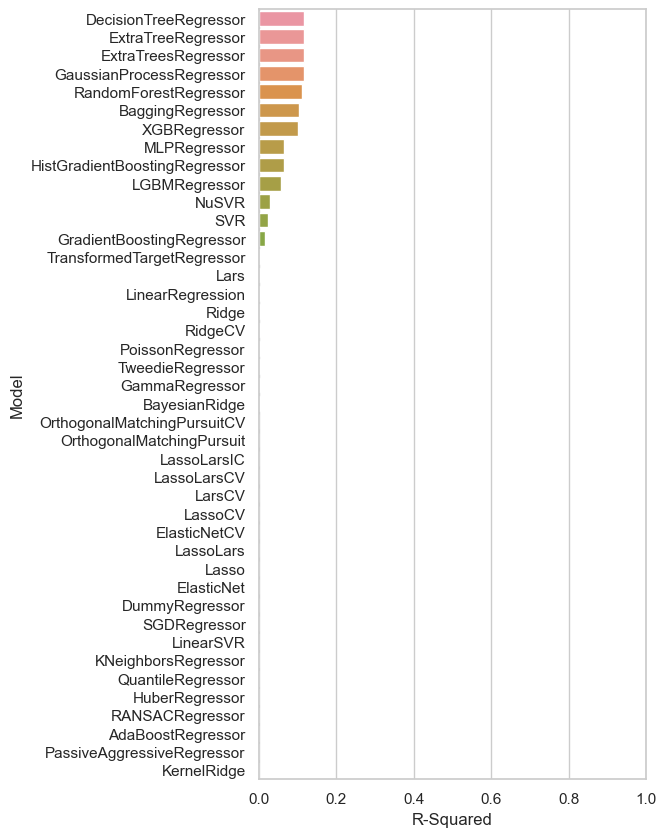

In [104]:

# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
     

[(0.0, 10.0)]

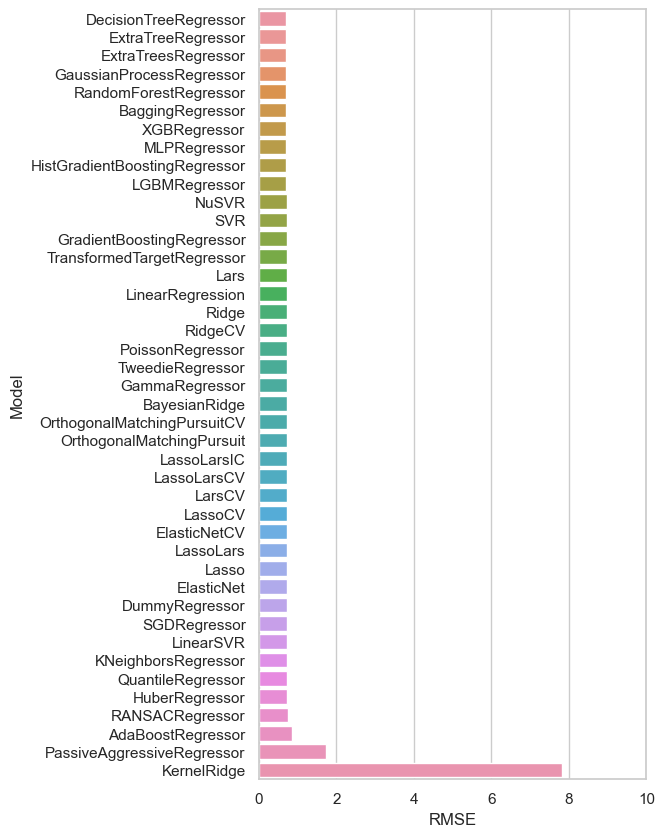

In [105]:

# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

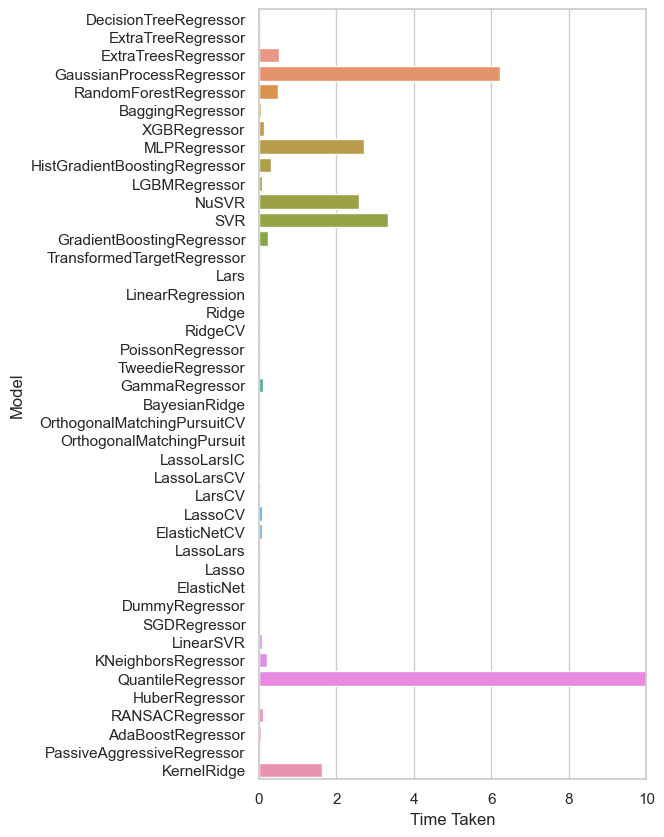

In [106]:

# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))